# Titanic Dataset

# Classification - KNN 

In [104]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [105]:
# reading data
df = pd.read_csv("../datasets/Classification/Titanic-Dataset.csv")
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [106]:
# manupulating string to float
df[['Sex']] = df[['Sex']].replace({'female':0, 'male':1})
df[['Embarked']] = df[['Embarked']].replace({'C':0, 'S':1, 'Q':2})

C:\Users\user\AppData\Local\Temp\ipykernel_14648\1920403339.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Sex']] = df[['Sex']].replace({'female':0, 'male':1})
C:\Users\user\AppData\Local\Temp\ipykernel_14648\1920403339.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Embarked']] = df[['Embarked']].replace({'C':0, 'S':1, 'Q':2})


In [107]:
# extracting needed data from df
x_data = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y_data = df['Survived'].values

In [108]:
# normalizing the data
from sklearn import preprocessing
x_data = preprocessing.StandardScaler().fit(x_data).transform(x_data.astype(float))

In [109]:
# splitting the data for train and test
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

In [110]:
# training the data
from sklearn.neighbors import KNeighborsClassifier as KNN
neigh = KNN(n_neighbors=1).fit(train_x, train_y)

In [111]:
# predicting
y_hat = neigh.predict(test_x)
y_hat

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [112]:
# testing
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(train_y, neigh.predict(train_x)))
print("Test set Accuracy: ", metrics.accuracy_score(test_y, y_hat))

Train set Accuracy:  1.0
Test set Accuracy:  0.6756756756756757


In [113]:
# We can calculate the accuracy of KNN for different values of k.
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = metrics.accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67567568, 0.72972973, 0.62162162, 0.75675676, 0.75675676,
       0.72972973, 0.78378378, 0.72972973, 0.72972973])

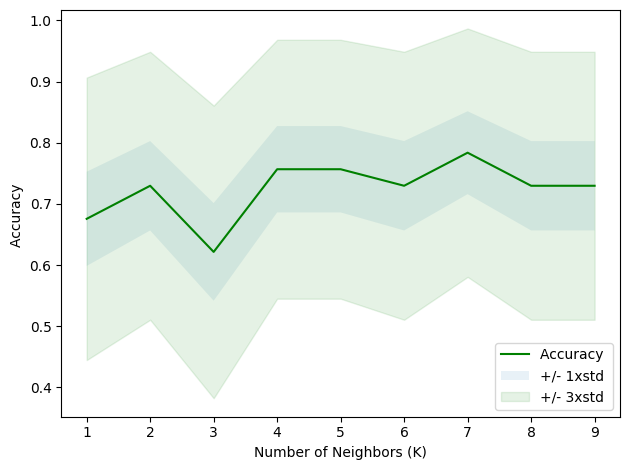

In [114]:
# Plotting the model accuracy for a different number of neighbors.
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [115]:
# print value of K which gives best prediction
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7837837837837838 with k= 7
